In [28]:
#Aryamann Srivastava,230211

In [29]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from sklearn.metrics import (classification_report, confusion_matrix,
                             accuracy_score, precision_recall_fscore_support, roc_curve, auc)
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
#loading datasets
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
print(train.head())
print(test.head)

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
<bound method NDFrame.head of          id keyword location  \
0         0     NaN      NaN   
1         2     NaN      NaN   
2         3     NaN      NaN   
3         9     NaN      NaN   
4        11     NaN      NaN   
...     ...     ...      ...   
3258  10861     NaN      NaN   
3259  10865     NaN      NaN   
3260  10868     NaN      NaN   
3261  10874     NaN      NaN   
3262  10875     NaN      NaN   

                                                  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
                 id      target
count   7613.000000  7613.00000
mean    5441.934848     0.42966
std     3137.116090     0.49506
min        1.000000     0.00000
25%     2734.000000     0.00000
50%     5408.000000     0.00000
75%     8146.000000     1.00000
max    10873.000000     1.00000
Missing Values:
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
Target Distribution:
target
0    4342
1    3271
Name: count, dtype: int64


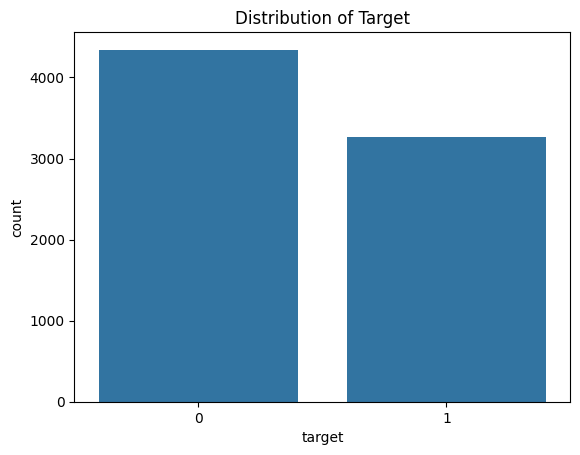

In [31]:
#data exploration
print(train.info())
print(train.describe())
print("Missing Values:")
print(train.isnull().sum())
print("Target Distribution:")
print(train['target'].value_counts())
sns.countplot(data=train,x='target')
plt.title('Distribution of Target')
plt.show()

In [32]:
#handling missing data
train['keyword'].fillna('', inplace=True)
train['location'].fillna('', inplace=True)

<ipython-input-32-06f70cb6d615>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['keyword'].fillna('', inplace=True)
<ipython-input-32-06f70cb6d615>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

WordCloud for Real Tweets


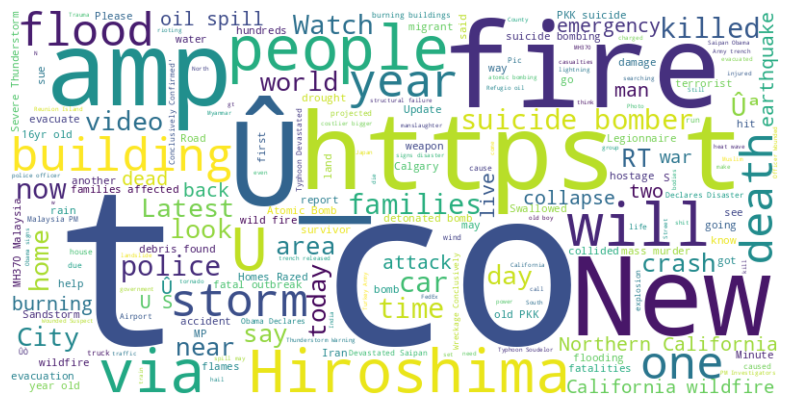

WordCloud for Fake Tweets


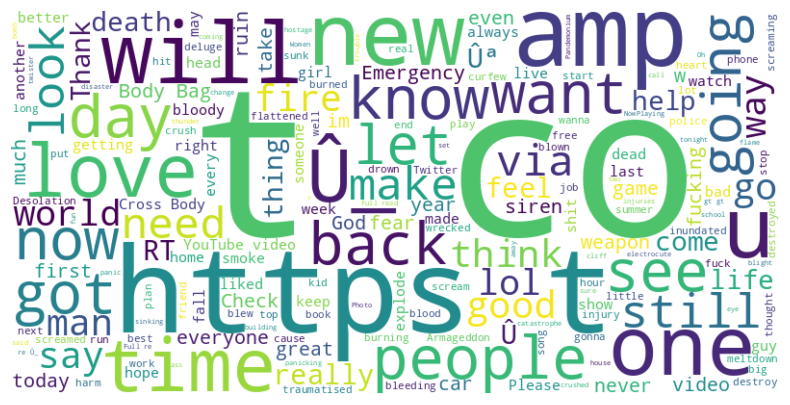

Entire WordCloud


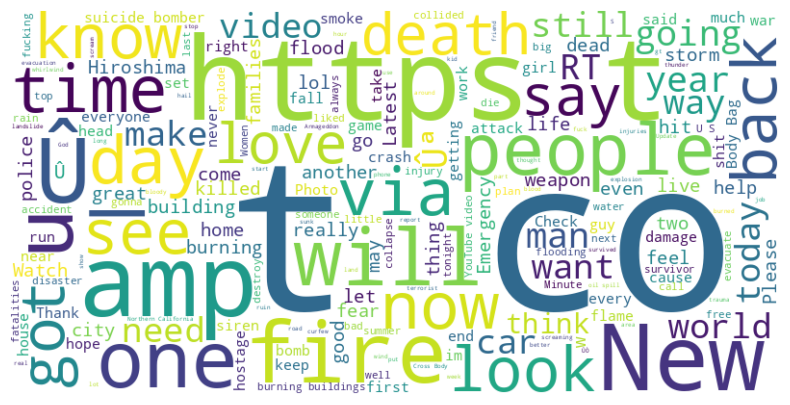

In [33]:
#WordCloud visualization
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

real_tweets = " ".join(train[train['target'] == 1]['text'])
fake_tweets = " ".join(train[train['target'] == 0]['text'])
total_tweets = " ".join(train['text'])

print("WordCloud for Real Tweets")
generate_wordcloud(real_tweets)

print("WordCloud for Fake Tweets")
generate_wordcloud(fake_tweets)

print("Entire WordCloud")
generate_wordcloud(total_tweets)

In [34]:
#text preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

train['cleaned_text'] = train['text'].apply(preprocess_text)

In [35]:
#feature extraction
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(train['cleaned_text']).toarray()
y = train['target']

In [36]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [37]:
#model building
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(kernel='linear',random_state=11,probability=True),
    "Naive Bayes": MultinomialNB()
}

results = {}

In [38]:
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    results[model_name] = {
        "accuracy": acc,
        "report": report
    }
    print(f"Accuracy for {model_name}: {acc}")
    print(report)

Training Logistic Regression...
Accuracy for Logistic Regression: 0.8168089297439265
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       885
           1       0.84      0.70      0.76       638

    accuracy                           0.82      1523
   macro avg       0.82      0.80      0.81      1523
weighted avg       0.82      0.82      0.81      1523

Training SVM...
Accuracy for SVM: 0.8174655285620486
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       885
           1       0.83      0.71      0.77       638

    accuracy                           0.82      1523
   macro avg       0.82      0.80      0.81      1523
weighted avg       0.82      0.82      0.82      1523

Training Naive Bayes...
Accuracy for Naive Bayes: 0.793827971109652
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       885
           1       0.80      0.


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       885
           1       0.84      0.70      0.76       638

    accuracy                           0.82      1523
   macro avg       0.82      0.80      0.81      1523
weighted avg       0.82      0.82      0.81      1523



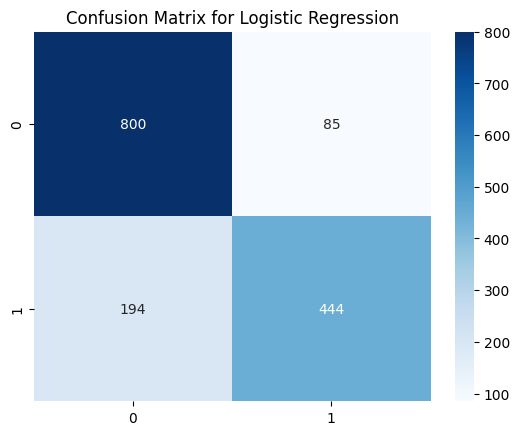


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       885
           1       0.83      0.71      0.77       638

    accuracy                           0.82      1523
   macro avg       0.82      0.80      0.81      1523
weighted avg       0.82      0.82      0.82      1523



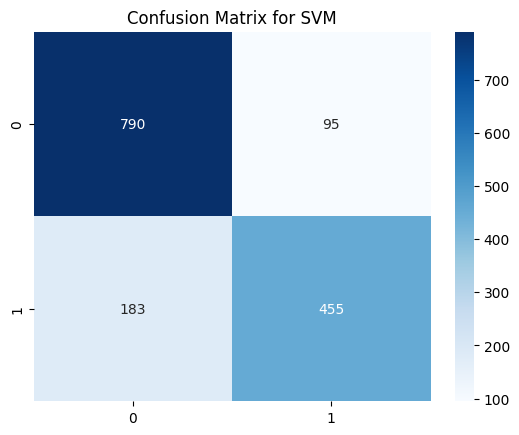


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       885
           1       0.80      0.68      0.73       638

    accuracy                           0.79      1523
   macro avg       0.80      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523



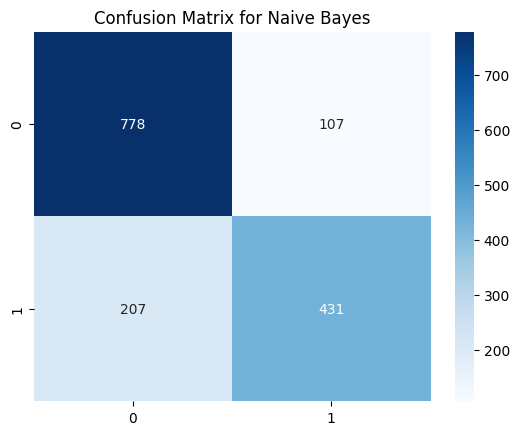

In [39]:
#visualizing results
for model_name, metrics in results.items():
    print(f"\n{model_name} Classification Report:\n{metrics['report']}")
    cm = confusion_matrix(y_test, models[model_name].predict(X_test))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

In [40]:
# Hyperparameter tuning for Logistic Regression
log_reg_params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
log_reg_grid = GridSearchCV(LogisticRegression(), log_reg_params, cv=5, scoring='accuracy', n_jobs=-1)
log_reg_grid.fit(X_train, y_train)

print(f"Best parameters for Logistic Regression: {log_reg_grid.best_params_}")
print(f"Best score for Logistic Regression: {log_reg_grid.best_score_}")

# Hyperparameter tuning for Naive Bayes
nb_params = {
    'alpha': [0.1, 0.5, 1.0, 5.0]
}
nb_grid = GridSearchCV(MultinomialNB(), nb_params, cv=5, scoring='accuracy', n_jobs=-1)
nb_grid.fit(X_train, y_train)

print(f"Best parameters for Naive Bayes: {nb_grid.best_params_}")
print(f"Best score for Naive Bayes: {nb_grid.best_score_}")

#I tried doing hyperparameter tuning but this code won't run at all for SVM

Best parameters for Logistic Regression: {'C': 1, 'solver': 'lbfgs'}
Best score for Logistic Regression: 0.7950738916256158
Best parameters for Naive Bayes: {'alpha': 1.0}
Best score for Naive Bayes: 0.7973727422003284


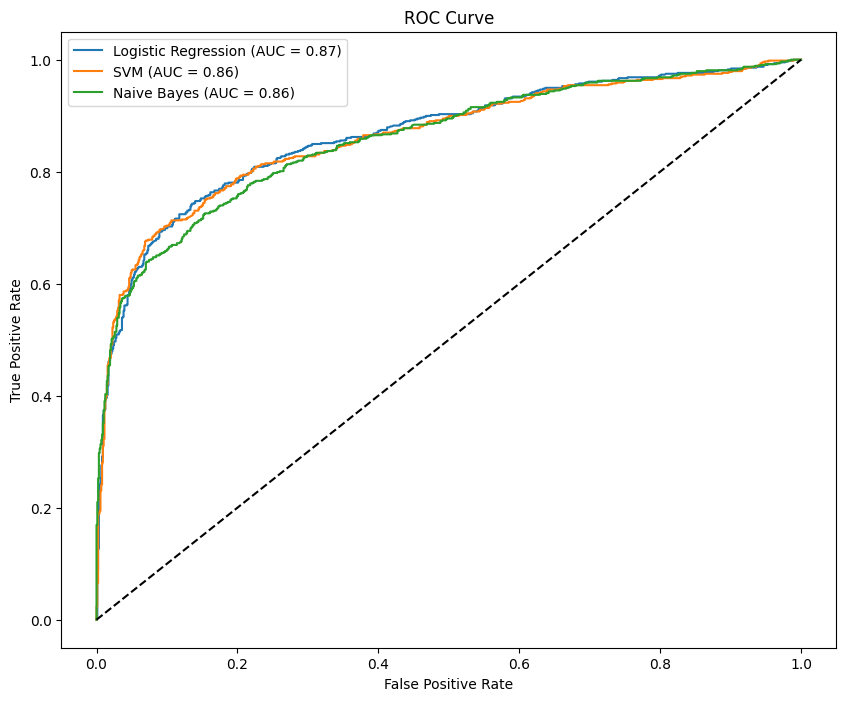

In [41]:
# ROC Curve
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()